In [ ]:
%load_ext autoreload
%autoreload 2

import torch
from model import LofiModel
from dataset_finetuning import MidiDataset
from finetune_config import *
print(torch.__version__)
print(torch.version.cuda)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2.7.1+cu118
11.8


In [8]:
dataset = MidiDataset(
        midi_dir=DATASET_DIR,
        metadata_csv_path=METADATA_CSV_PATH,
        num_bars=NUM_BARS,
        steps_per_bar=STEPS_PER_BAR,
        use_sliding_window=USE_SLIDING_WINDOW,
        stride_in_bars=STRIDE_IN_BARS
    )

Found 4084 MIDI files.
Processing MIDI files, normalizing tempo, and extracting segments...


Processing files:  12%|█▏        | 471/4084 [00:58<07:31,  8.00it/s]


KeyboardInterrupt: 

## Reconstruction

Epoch 200
Successfully loaded weights from C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\Modele LOFI\lofi_model_epoch_200.pth
Converting tensor to MIDI file at reconstructed/lofi_model/reconstructed_new_200.mid...
MIDI file saved successfully.


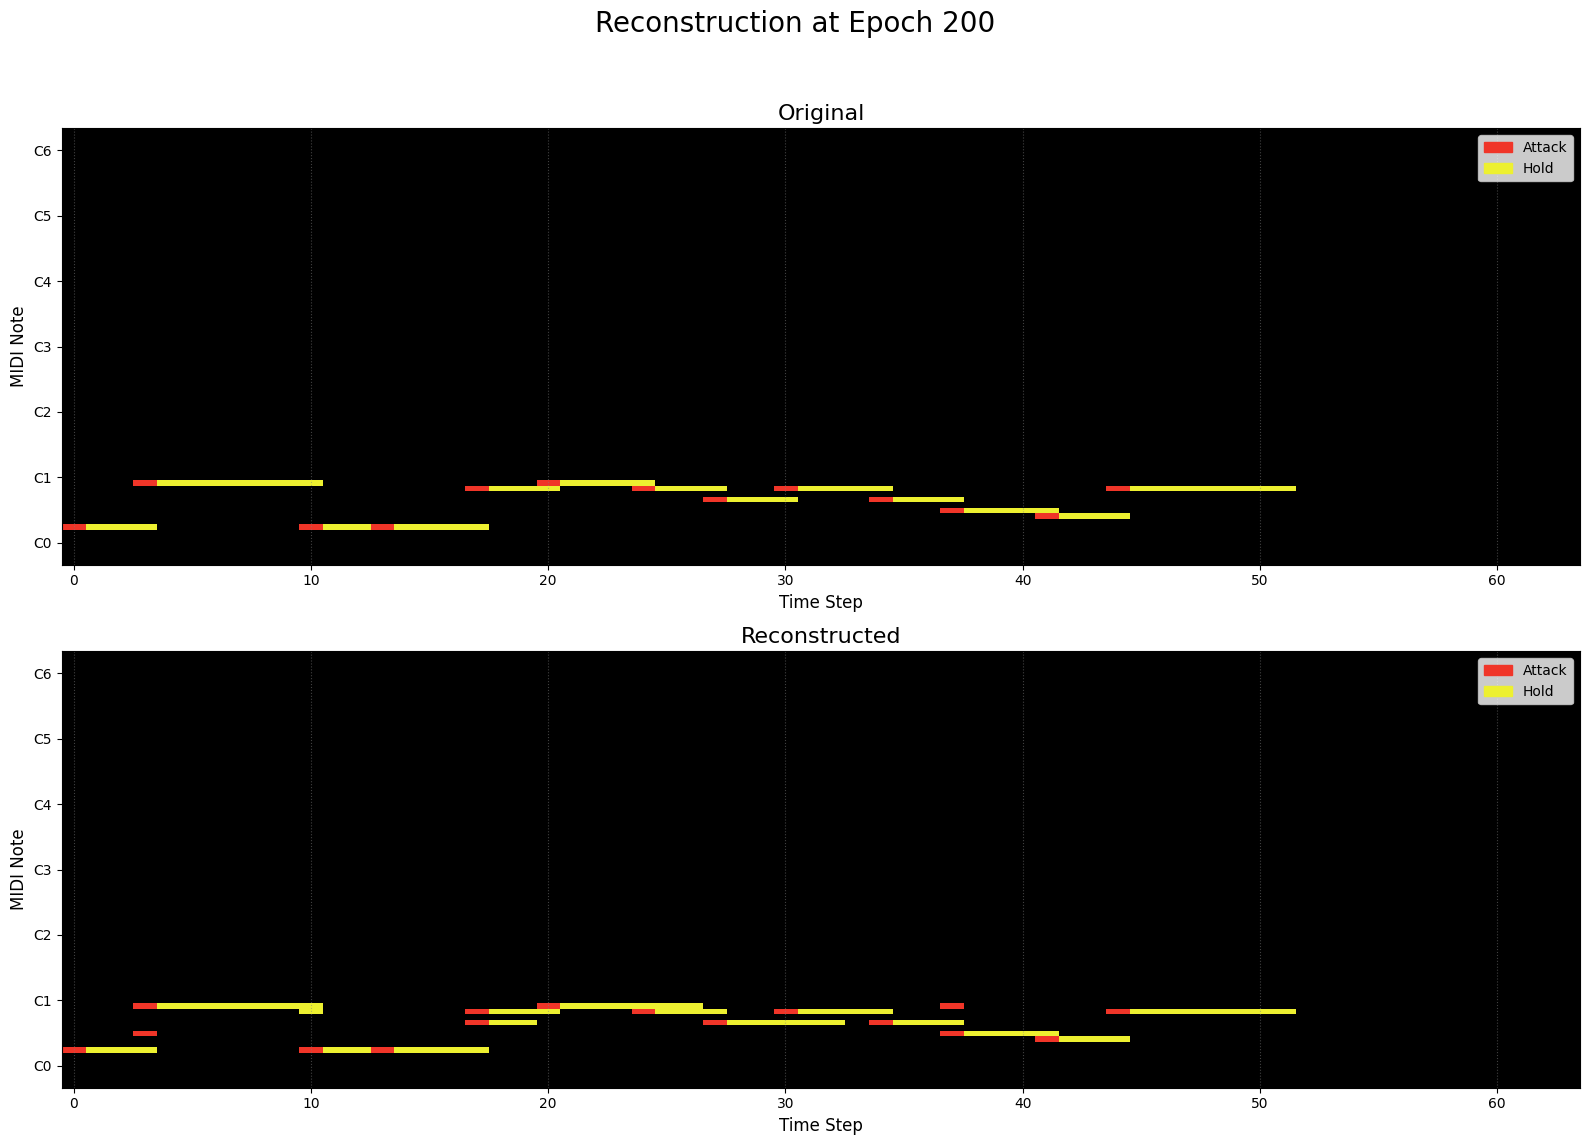

________________________________________________________________________________________________________________________


Epoch 230
Successfully loaded weights from C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\Modele LOFI\lofi_model_epoch_230.pth
Converting tensor to MIDI file at reconstructed/lofi_model/reconstructed_new_230.mid...
MIDI file saved successfully.


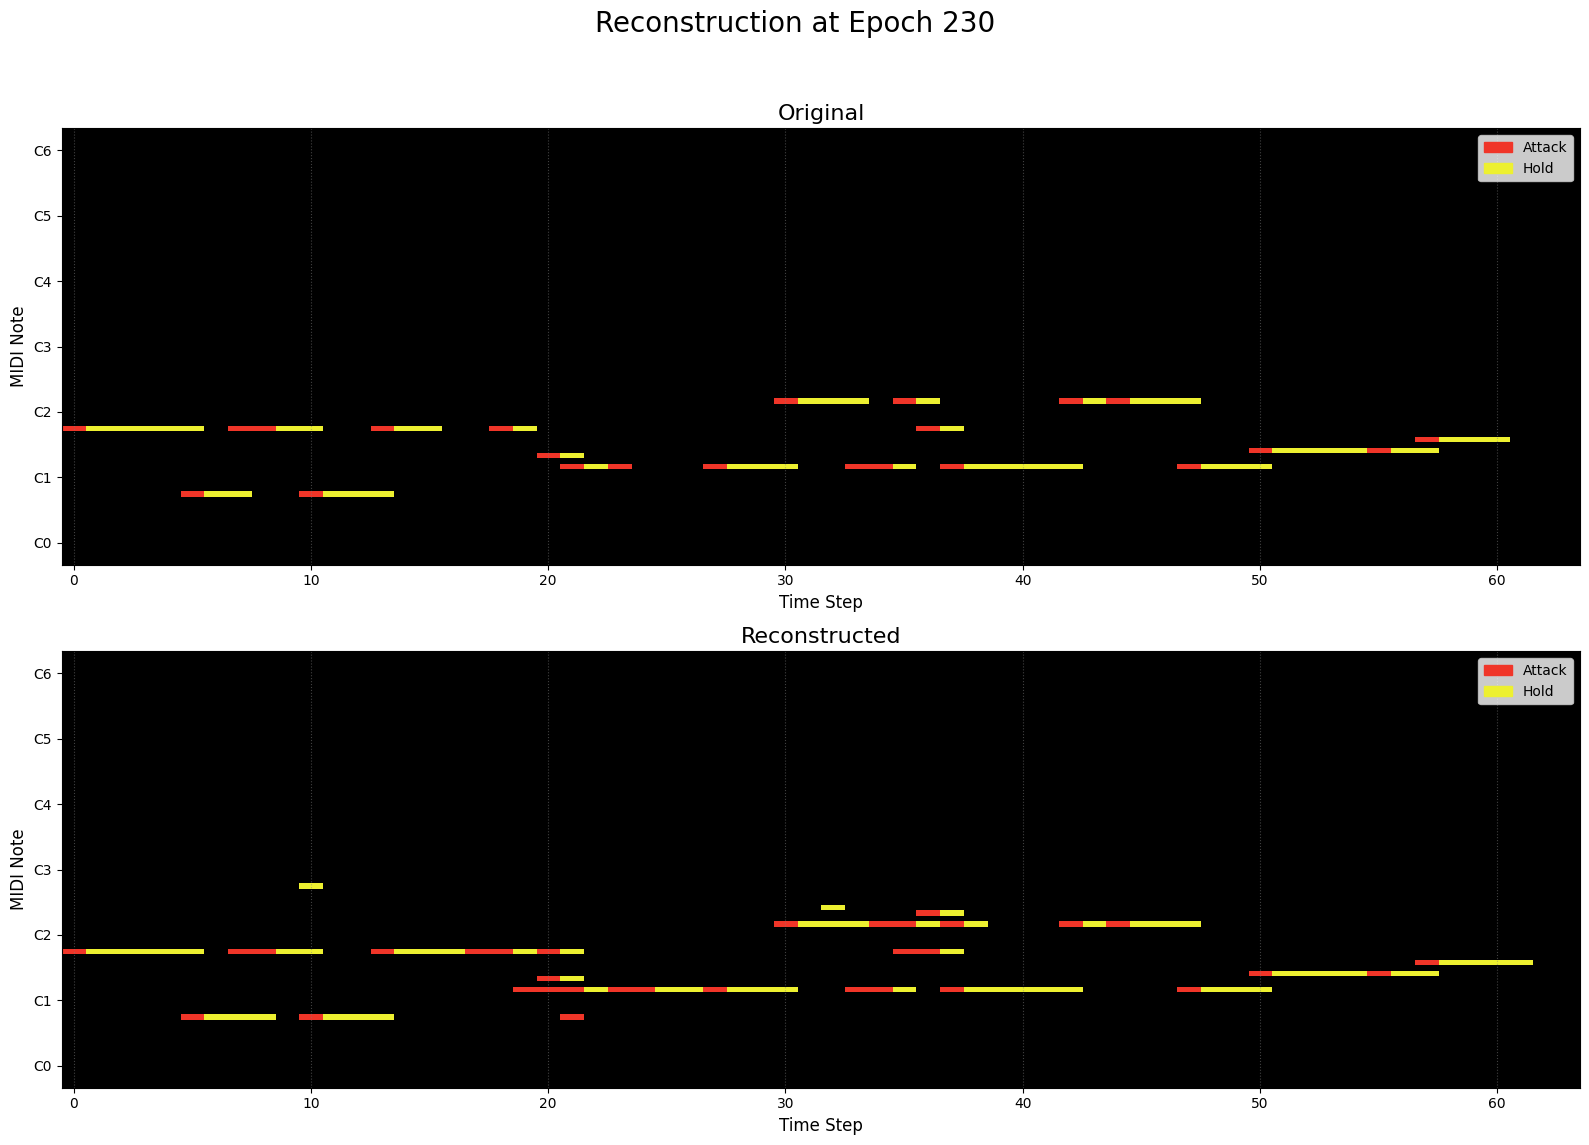

________________________________________________________________________________________________________________________


Epoch 270
Successfully loaded weights from C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\Modele LOFI\lofi_model_epoch_270.pth
Converting tensor to MIDI file at reconstructed/lofi_model/reconstructed_new_270.mid...
MIDI file saved successfully.


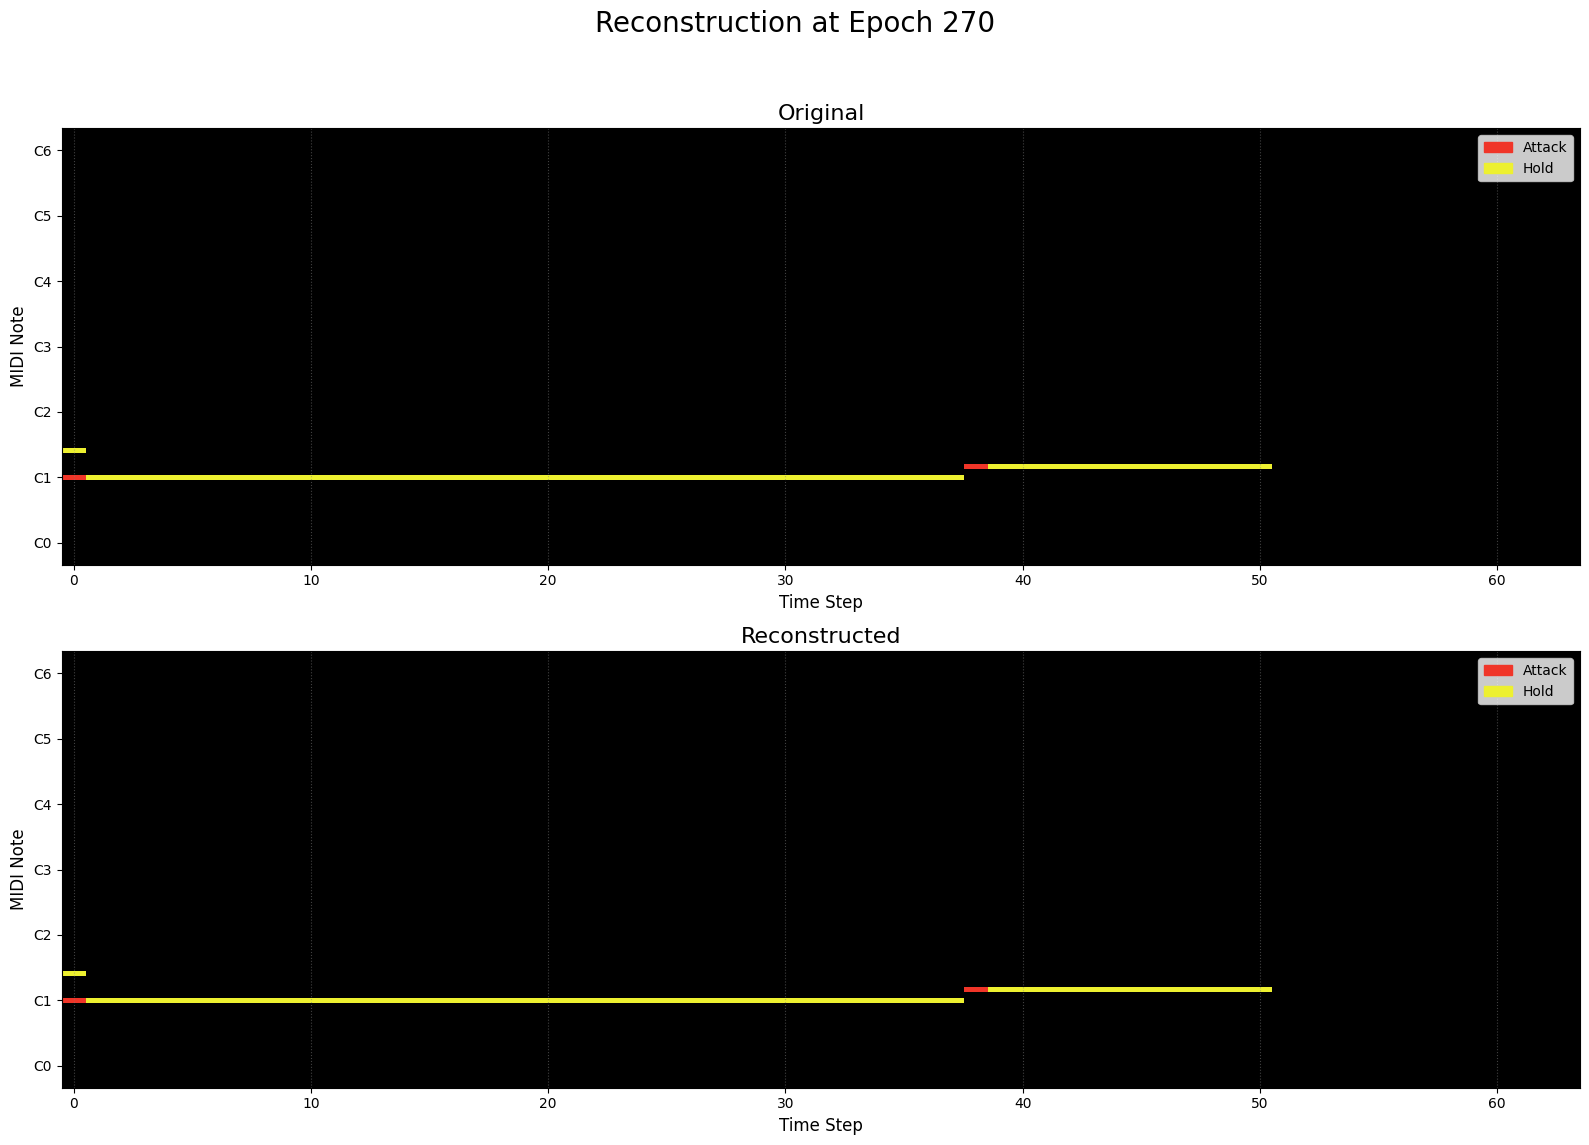

________________________________________________________________________________________________________________________


Epoch 300
Successfully loaded weights from C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\Modele LOFI\lofi_model_epoch_300.pth
Converting tensor to MIDI file at reconstructed/lofi_model/reconstructed_new_300.mid...
MIDI file saved successfully.


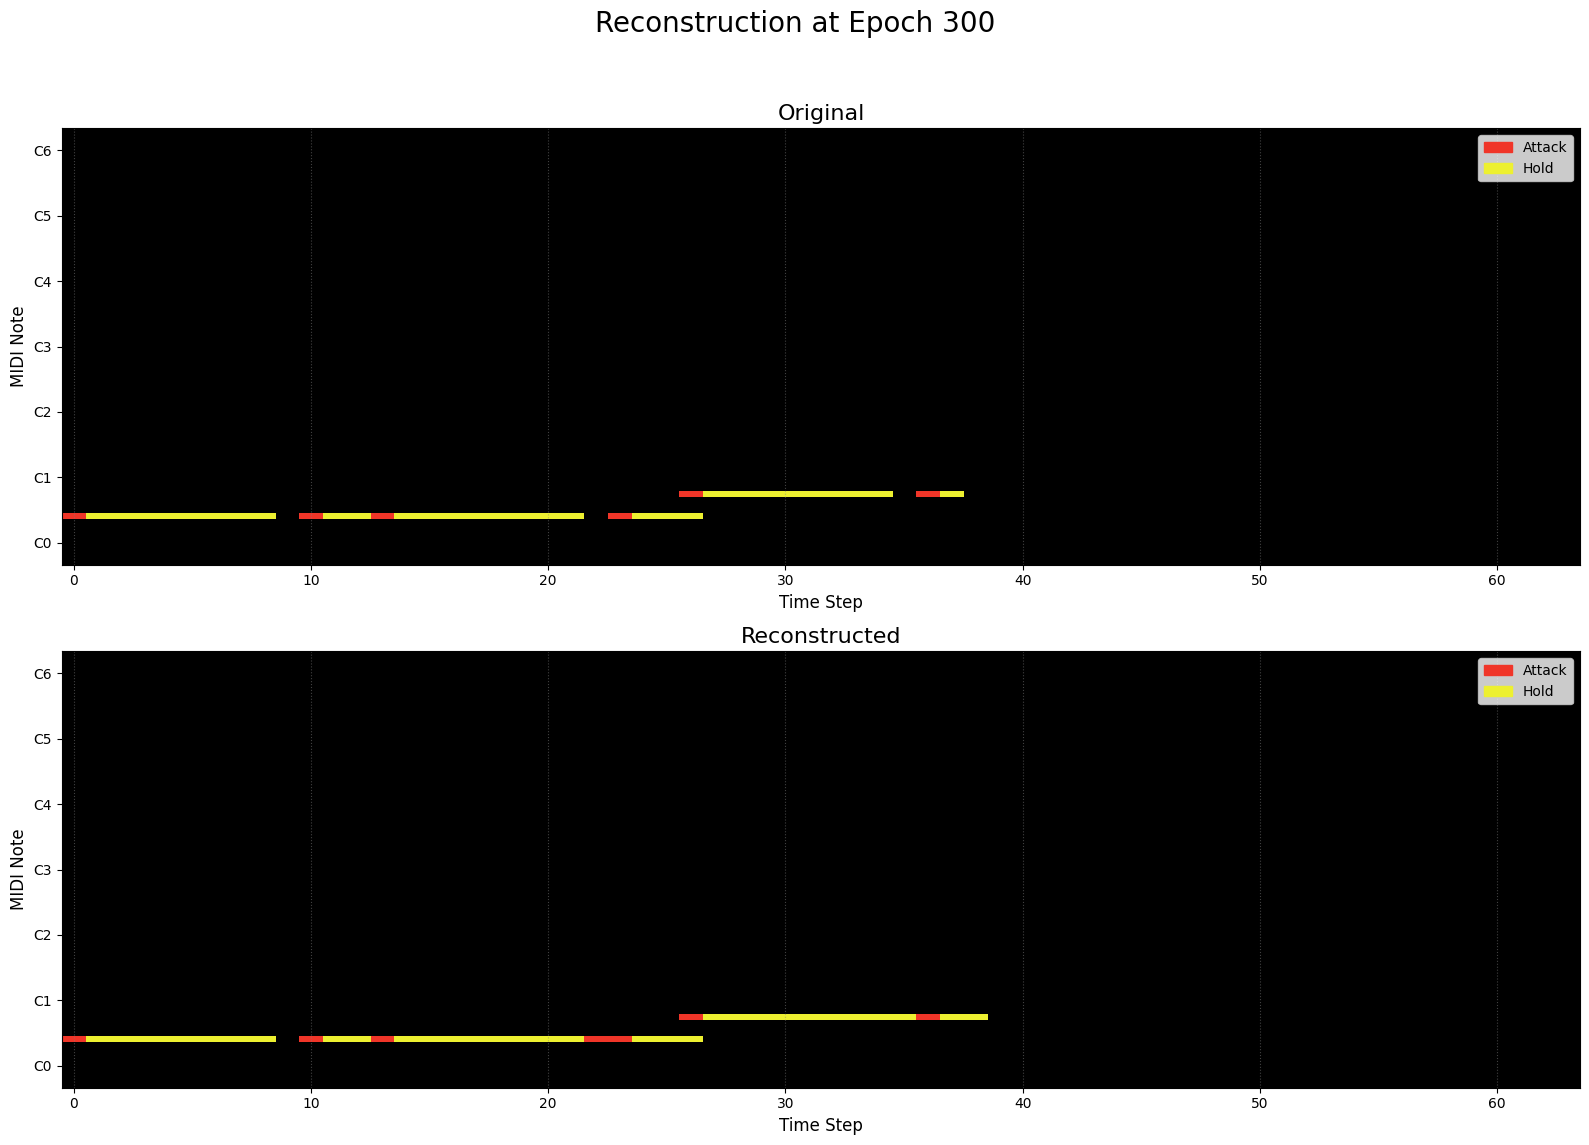

________________________________________________________________________________________________________________________


Epoch 320
Successfully loaded weights from C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\Modele LOFI\lofi_model_epoch_320.pth
Converting tensor to MIDI file at reconstructed/lofi_model/reconstructed_new_320.mid...
MIDI file saved successfully.


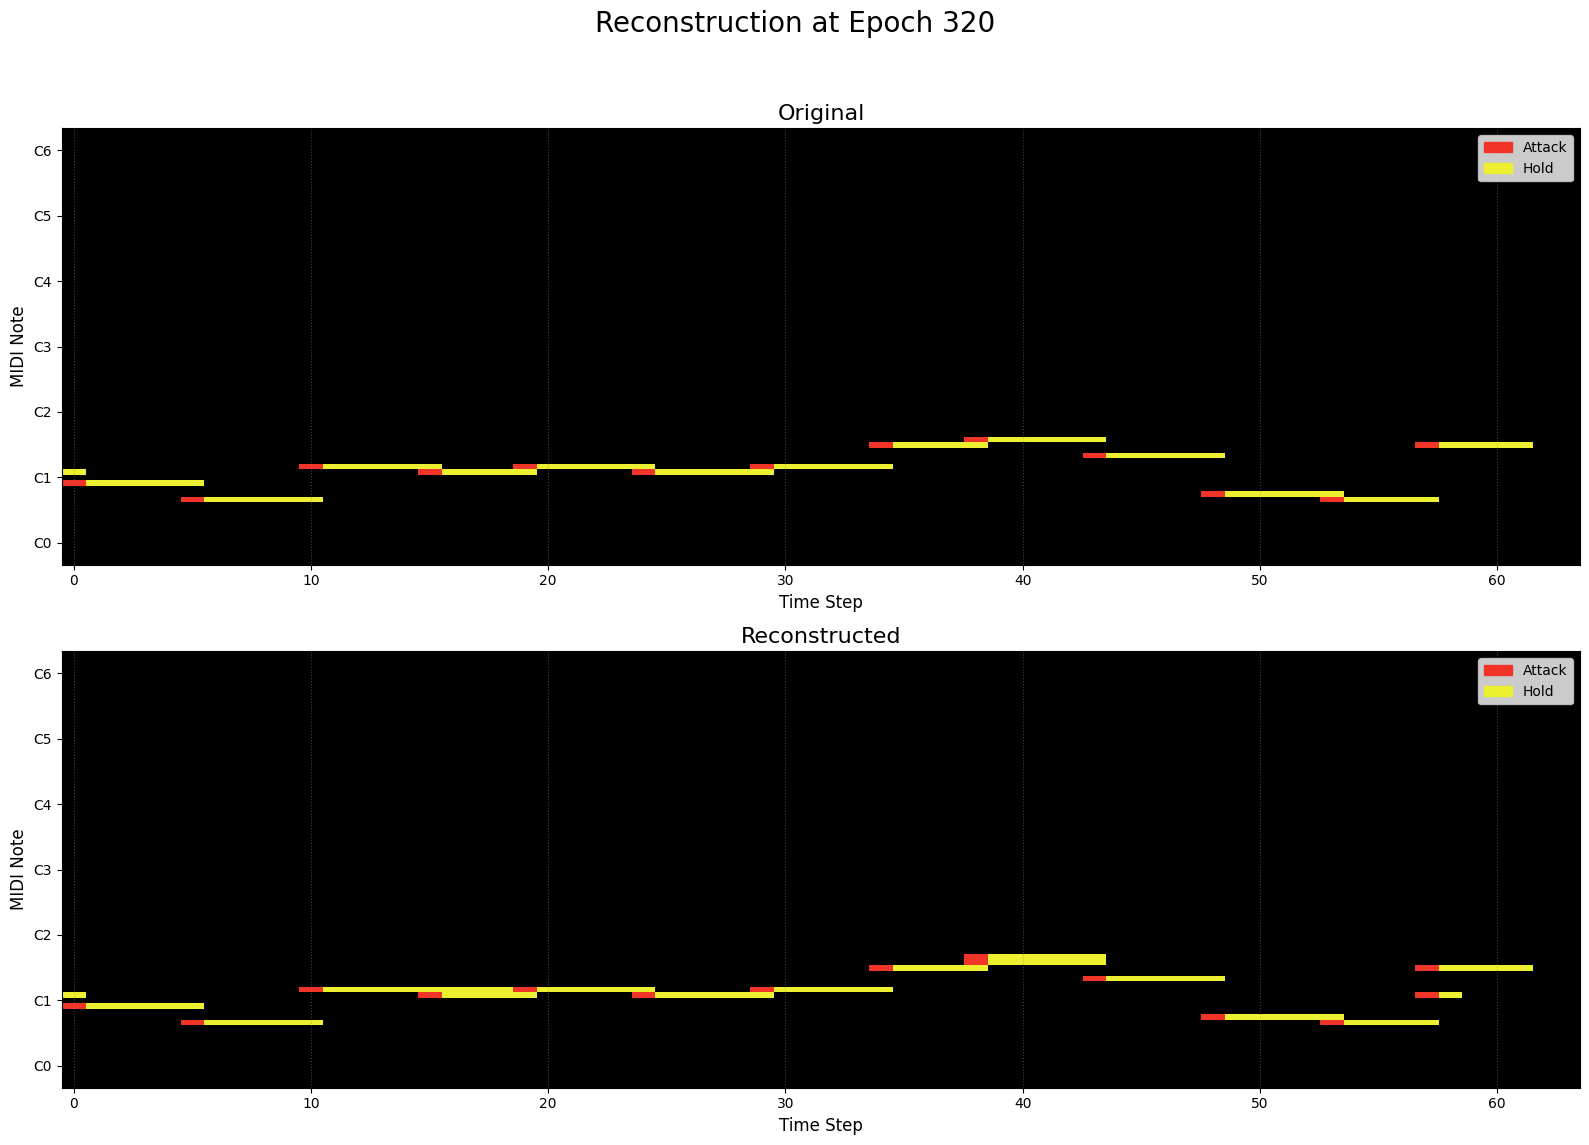

________________________________________________________________________________________________________________________




In [6]:
from matplotlib import pyplot as plt

for epoch in [200, 230, 270, 300, 320]:
    print(f"Epoch {epoch}")
    model = LofiModel()
    model.load_weights(rf"C:\Users\Hyperbook\Desktop\STUDIA\SEM III\PZ#2\model\checkpoints\Modele LOFI\lofi_model_epoch_{epoch}.pth")
    original_sequence_tensor, _ = dataset[epoch]
    # print(f"Processing file: {file_name}")
    reconstructions = model.reconstruct(original_sequence_tensor, output_path=f"reconstructed/lofi_model/reconstructed_new_{epoch}.mid")

    fig, axes = plt.subplots(2, 1, figsize=(16, 12))
    fig.suptitle(f"Reconstruction at Epoch {epoch}", fontsize=20)
    
    MidiDataset.visualize(original_sequence_tensor, title="Original", ax=axes[0], show_plot=False)
    MidiDataset.visualize(reconstructions, title="Reconstructed", ax=axes[1], show_plot=False)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    display(fig)
    plt.close(fig)
    
    print(60*"__"+"\n")
    print()